In [2]:
import pandas as pd
import numpy as np

In [3]:
Data = pd.read_csv("C:/Users/rajendra/Desktop/loan.csv")

C:\Users\rajendra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Data.shape

(39717, 111)

# handling Missing Values

In [5]:
null_per = round(Data.isnull().sum(axis=0).sort_values(ascending=False)/len(Data.index)*100, 2)

In [6]:
FData = Data[Data.columns[Data.isnull().mean()<0.1]]

In [7]:
FData.dropna(axis=0, inplace=True)

C:\Users\rajendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Creating Groups by datatype

In [8]:
t = FData.columns.to_series().groupby(FData.dtypes).groups

In [9]:
col_dict = {key.name: value for key, value in t.items()}

In [10]:
CharData = FData.loc[:,col_dict['object']]

In [11]:
IntData = FData.loc[:,col_dict['int64']]

In [12]:
FloatData = FData.loc[:,col_dict['float64']]

# Handling Characterd Variables

In [13]:
CharData["term"].value_counts()

 36 months    26375
 60 months    10056
Name: term, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
X = (CharData.term.value_counts()[0], CharData.term.value_counts()[1])
Y = ['36 months', '60 months']

Text(0, 0.5, 'Number of Customers')

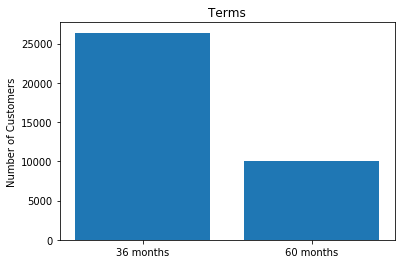

In [16]:
plt.bar(Y, X)
plt.title("Terms")
plt.ylabel("Number of Customers")

In [17]:
CharData['revol_util'] = CharData['revol_util'].astype(str).str.split(pat='%').map(lambda x:x[0]).astype('float')
CharData['int_rate'] = CharData['int_rate'].astype(str).str.split(pat='%').map(lambda x:x[0]).astype('float')

In [ ]:
#pymnt_plan is a unique value feature not important for Analysis
#url is not important we cant get any data from url
#title is not important because int has many value which is not usefull to analyse the data
#initial_list_status is a unique value feature hence it can be removed safely.
#application_type is a unique value feature hence it can be removed safely.

In [18]:
CharData.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [19]:
CharData.drop(["zip_code","application_type","initial_list_status","title","url","pymnt_plan"], axis=1, inplace=True)

In [20]:
CharData.head(4)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
1,60 months,15.27,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,9.4,Apr-13,Sep-13
3,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96,21.0,Jan-15,Apr-16
4,60 months,12.69,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,other,OR,Jan-96,53.9,May-16,May-16
5,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,Nov-04,28.3,Jan-15,Jan-16


In [21]:
CharData['earliest_cr_line'] = pd.to_datetime(CharData['earliest_cr_line'],format='%b-%y',dayfirst = True)
CharData['last_pymnt_d'] = pd.to_datetime(CharData['last_pymnt_d'],format='%b-%y',dayfirst = True)
CharData['last_credit_pull_d'] = pd.to_datetime(CharData['last_credit_pull_d'],format='%b-%y',dayfirst = True)
CharData['issue_d'] = pd.to_datetime(CharData['issue_d'],format='%b-%y',dayfirst = True)

In [22]:
CharData['term'] = CharData['term'].astype(str).str.split(pat='months').map(lambda x:x[0]).astype('int')
CharData['emp_length'] = CharData['emp_length'].astype(str).str.split(pat='years').map(lambda x:x[0]).astype('str')
CharData['emp_length'] = CharData['emp_length'].astype(str).str.split(pat='year').map(lambda x:x[0]).astype('str')
CharData['emp_length'] = CharData['emp_length'].astype(str).str.split(pat='+').map(lambda x:x[0]).astype('str')
CharData['emp_length'] = CharData['emp_length'].astype(str).str.split(pat='<').map(lambda x:x[0]).astype('str')

In [ ]:
## issue_d : The month which the loan was funded
## earliest_cr_line : The month the borrower's earliest reported credit line was opened
## last_credit_pull_d : The most recent month LC pulled credit for this loan

In [23]:
CharData.emp_length.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [24]:
CharData.emp_length = CharData.emp_length.fillna(0)

In [25]:
CharData.head(5)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
1,60,15.27,C,C4,Ryder,0,RENT,Source Verified,2011-12-01,Charged Off,car,GA,1999-04-01,9.4,2013-04-01,2013-09-01
3,36,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,Source Verified,2011-12-01,Fully Paid,other,CA,1996-02-01,21.0,2015-01-01,2016-04-01
4,60,12.69,B,B5,University Medical Group,1,RENT,Source Verified,2011-12-01,Current,other,OR,1996-01-01,53.9,2016-05-01,2016-05-01
5,36,7.90,A,A4,Veolia Transportaton,3,RENT,Source Verified,2011-12-01,Fully Paid,wedding,AZ,2004-11-01,28.3,2015-01-01,2016-01-01
6,60,15.96,C,C5,Southern Star Photography,8,RENT,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,2005-07-01,85.6,2016-05-01,2016-05-01


### zip_code is not important varible for analysis as it contain many different values without any pattern

In [26]:
CharData.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [27]:
y = CharData.loan_status

In [28]:
CharData.head(5)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
1,60,15.27,C,C4,Ryder,0,RENT,Source Verified,2011-12-01,Charged Off,car,GA,1999-04-01,9.4,2013-04-01,2013-09-01
3,36,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,Source Verified,2011-12-01,Fully Paid,other,CA,1996-02-01,21.0,2015-01-01,2016-04-01
4,60,12.69,B,B5,University Medical Group,1,RENT,Source Verified,2011-12-01,Current,other,OR,1996-01-01,53.9,2016-05-01,2016-05-01
5,36,7.90,A,A4,Veolia Transportaton,3,RENT,Source Verified,2011-12-01,Fully Paid,wedding,AZ,2004-11-01,28.3,2015-01-01,2016-01-01
6,60,15.96,C,C5,Southern Star Photography,8,RENT,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,2005-07-01,85.6,2016-05-01,2016-05-01


In [29]:
CharData['home_ownership'].value_counts()

RENT        17464
MORTGAGE    16298
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64

In [30]:
from datetime import datetime

In [31]:
date_format = "%Y-%m-%d"

a = datetime.strptime('1999-04-01', date_format)
b = datetime.strptime('2013-05-14', date_format)
delta = b - a
print(delta.days)

5157


# Handling Integer Data

In [32]:
IntData.head(5)

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt
1,1077430,1314167,2500,2500,0,5,3,0,1687,4,1,0,0
3,1076863,1277178,10000,10000,0,1,10,0,5598,37,1,0,0
4,1075358,1311748,3000,3000,0,0,15,0,27783,38,1,0,0
5,1075269,1311441,5000,5000,0,3,9,0,7963,12,1,0,0
6,1069639,1304742,7000,7000,0,1,7,0,17726,11,1,0,0


In [33]:
IntData.isnull().sum()

id                0
member_id         0
loan_amnt         0
funded_amnt       0
delinq_2yrs       0
inq_last_6mths    0
open_acc          0
pub_rec           0
revol_bal         0
total_acc         0
policy_code       0
acc_now_delinq    0
delinq_amnt       0
dtype: int64

In [34]:
IntData.describe()

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt
count,3.643100e+04,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.0,36431.0,36431.0
mean,6.910141e+05,8.611116e+05,11307.794186,11032.933491,0.146139,0.864840,9.351679,0.053663,13466.188740,22.246137,1.0,0.0,0.0
std,2.026042e+05,2.538291e+05,7433.904309,7166.520054,0.492211,1.063383,4.373724,0.234897,15702.347369,11.376630,0.0,0.0,0.0
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.0,0.0,0.0
25%,5.226890e+05,6.755430e+05,5600.000000,5500.000000,0.000000,0.000000,6.000000,0.000000,3832.000000,14.000000,1.0,0.0,0.0
50%,6.705750e+05,8.569760e+05,10000.000000,10000.000000,0.000000,1.000000,9.000000,0.000000,9031.000000,21.000000,1.0,0.0,0.0
75%,8.399035e+05,1.049794e+06,15000.000000,15000.000000,0.000000,1.000000,12.000000,0.000000,17231.500000,29.000000,1.0,0.0,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,1.0,0.0,0.0


In [ ]:
### acc_now_delinq and delinq_amnt amount contains unique value 0 Hence they can be remove safely. 

In [35]:
IntData.drop(['acc_now_delinq','delinq_amnt'], axis=1, inplace=True)

In [36]:
IntData.describe()

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code
count,3.643100e+04,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.0
mean,6.910141e+05,8.611116e+05,11307.794186,11032.933491,0.146139,0.864840,9.351679,0.053663,13466.188740,22.246137,1.0
std,2.026042e+05,2.538291e+05,7433.904309,7166.520054,0.492211,1.063383,4.373724,0.234897,15702.347369,11.376630,0.0
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.0
25%,5.226890e+05,6.755430e+05,5600.000000,5500.000000,0.000000,0.000000,6.000000,0.000000,3832.000000,14.000000,1.0
50%,6.705750e+05,8.569760e+05,10000.000000,10000.000000,0.000000,1.000000,9.000000,0.000000,9031.000000,21.000000,1.0
75%,8.399035e+05,1.049794e+06,15000.000000,15000.000000,0.000000,1.000000,12.000000,0.000000,17231.500000,29.000000,1.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,1.0


In [37]:
IntData.drop(['policy_code'], axis=1, inplace=True)

In [38]:
IntData.head(5)

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
1,1077430,1314167,2500,2500,0,5,3,0,1687,4
3,1076863,1277178,10000,10000,0,1,10,0,5598,37
4,1075358,1311748,3000,3000,0,0,15,0,27783,38
5,1075269,1311441,5000,5000,0,3,9,0,7963,12
6,1069639,1304742,7000,7000,0,1,7,0,17726,11


In [39]:
IntData['pub_rec'].value_counts()

0    34543
1     1832
2       47
3        7
4        2
Name: pub_rec, dtype: int64

# Handling Float Varibles

In [40]:
FloatData.isnull().sum()

funded_amnt_inv               0
installment                   0
annual_inc                    0
dti                           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
chargeoff_within_12_mths      0
pub_rec_bankruptcies          0
tax_liens                     0
dtype: int64

In [41]:
FloatData.describe()

,funded_amnt_inv,installment,annual_inc,dti,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.0,36431.0,36431.000000,36431.0
mean,10601.876895,326.187642,6.930694e+04,13.444293,52.468572,52.216180,12311.226392,11841.691116,9912.631803,2304.442520,1.299912,92.852238,11.677622,2743.075381,0.0,0.0,0.041366,0.0
std,7072.645601,207.390058,6.354376e+04,6.643417,379.861072,378.454016,9048.552965,8911.170172,7053.310578,2629.598904,7.065817,682.064837,140.884174,4473.621163,0.0,0.0,0.200100,0.0
min,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,0.0,0.000000,0.0
25%,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.000000,5672.634184,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,226.310000,0.0,0.0,0.000000,0.0
50%,9203.371902,283.280000,6.000000e+04,13.540000,0.000000,0.000000,10101.589360,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.0,0.0,0.000000,0.0
75%,14508.774540,432.220000,8.300000e+04,18.690000,0.000000,0.000000,16700.865405,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,3457.620000,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


In [42]:
FloatData['collections_12_mths_ex_med'].value_counts()

0.0    36431
Name: collections_12_mths_ex_med, dtype: int64

In [43]:
FloatData['chargeoff_within_12_mths'].value_counts()

0.0    36431
Name: chargeoff_within_12_mths, dtype: int64

In [44]:
FloatData['tax_liens'].value_counts()

0.0    36431
Name: tax_liens, dtype: int64

In [ ]:
### we can remove collections_12_mths_ex_med, chargeoff_within_12_mths,tax_liens because it contains unique values.

In [45]:
FloatData.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True)

In [46]:
FloatData.head(5)

,funded_amnt_inv,installment,annual_inc,dti,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
1,2500.0,59.83,30000.0,1.00,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
3,10000.0,339.31,49200.0,20.00,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,3000.0,67.79,80000.0,17.94,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0
5,5000.0,156.46,36000.0,11.20,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
6,7000.0,170.08,47004.0,23.51,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0


In [47]:
FloatData['pub_rec_bankruptcies'].value_counts()

0.0    34931
1.0     1493
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
# For Devciding importance of variable lets Combine Data

In [48]:
data = pd.concat([IntData, FloatData, y], axis=1)

In [49]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
1,1077430,1314167,2500,2500,0,5,3,0,1687,4,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Charged Off
3,1076863,1277178,10000,10000,0,1,10,0,5598,37,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Fully Paid
4,1075358,1311748,3000,3000,0,0,15,0,27783,38,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,Current
5,1075269,1311441,5000,5000,0,3,9,0,7963,12,...,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Fully Paid
6,1069639,1304742,7000,7000,0,1,7,0,17726,11,...,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Fully Paid


In [50]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'loan_status'],
      dtype='object')

In [51]:
data.drop(['id', 'member_id'], axis=1, inplace=True)

In [ ]:
#data.drop(['grade'], axis=1, inplace = True)

In [52]:
data.head(5)

,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,funded_amnt_inv,installment,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
1,2500,2500,0,5,3,0,1687,4,2500.0,59.83,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Charged Off
3,10000,10000,0,1,10,0,5598,37,10000.0,339.31,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Fully Paid
4,3000,3000,0,0,15,0,27783,38,3000.0,67.79,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,Current
5,5000,5000,0,3,9,0,7963,12,5000.0,156.46,...,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Fully Paid
6,7000,7000,0,1,7,0,17726,11,7000.0,170.08,...,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,Fully Paid


In [53]:
CData = data[data.loan_status != 'Current']

In [54]:
CData.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

C:\Users\rajendra\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
CData['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Name: loan_status, dtype: int64

In [57]:
y = CData['loan_status']

In [58]:
CData.drop(['loan_status'], axis=1, inplace=True)

In [59]:
df = CData.to_csv("Data.csv")

In [70]:
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(CData, y, test_size=0.3)


In [62]:
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features="auto",
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)



In [63]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       1.00      0.97      0.98      1479
  Fully Paid       1.00      1.00      1.00      9131

   micro avg       1.00      1.00      1.00     10610
   macro avg       1.00      0.99      0.99     10610
weighted avg       1.00      1.00      1.00     10610



In [66]:
fi = model.feature_importances_

In [67]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": model.feature_importances_}
)

In [68]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": model.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)

In [69]:
importance

,feature,importance
17,recoveries,0.316760
18,collection_recovery_fee,0.239148
14,total_rec_prncp,0.145726
12,total_pymnt,0.059559
8,funded_amnt_inv,0.048744
1,funded_amnt,0.043727
13,total_pymnt_inv,0.035809
19,last_pymnt_amnt,0.027252
9,installment,0.026413
0,loan_amnt,0.025756


In [71]:
print(confusion_matrix(y_test, y_pred))

[[1435   44]
 [   0 9131]]
